In [226]:
from yahoo_finance import Share
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [237]:
sym = 'spy'
yahoo = Share(sym)

historical_train = yahoo.get_historical('2010-01-01', '2016-01-01')
historical_test = yahoo.get_historical('2016-01-01', '2016-04-04')

for n in xrange(1, len(historical_train)):
    if historical_train[n-1]['Close'] > historical_train[n]['Close']:
        historical_train[n]['Pred'] = 1
    elif historical_train[n-1]['Close'] < historical_train[n]['Close']:
        historical_train[n]['Pred'] = -1
    else:
        historical_train[n]['Pred'] = 0
    #print historical[n]['Pred']

for n in xrange(1, len(historical_test)):
    if historical_test[n-1]['Close'] > historical_test[n]['Close']:
        historical_test[n]['Pred'] = 1
    elif historical_test[n-1]['Close'] < historical_test[n]['Close']:
        historical_test[n]['Pred'] = -1
    else:
        historical_test[n]['Pred'] = 0

#historical.pop()
df_train = pd.DataFrame(historical_train[1:len(historical_train)])
df_train['Date_Time'] = pd.to_datetime(df_train['Date']).apply(pd.datetools.normalize_date)
df_train['DOW'] = df_train['Date_Time'].dt.dayofweek
df_train['DOY'] = df_train['Date_Time'].dt.dayofyear
df_train['WOY'] = df_train['Date_Time'].dt.weekofyear
df_train['Year'] = df_train['Date_Time'].dt.year
df_train['Month'] = df_train['Date_Time'].dt.month
df_train['Quarter'] = df_train['Date_Time'].dt.quarter

df_test = pd.DataFrame(historical_test[1:len(historical_test)])
df_test['Date_Time'] = pd.to_datetime(df_test['Date']).apply(pd.datetools.normalize_date)
df_test['DOW'] = df_test['Date_Time'].dt.dayofweek
df_test['DOY'] = df_test['Date_Time'].dt.dayofyear
df_test['WOY'] = df_test['Date_Time'].dt.weekofyear
df_test['Year'] = df_test['Date_Time'].dt.year
df_test['Month'] = df_test['Date_Time'].dt.month
df_test['Quarter'] = df_test['Date_Time'].dt.quarter

# Random Forest

In [238]:
#features = ['Open', 'Close', 'High', 'Low', 'DOW', 'DOY', 'WOY', 'Year', 'Month', 'Quarter']
features = ['Open', 'Close', 'High', 'Low']

X_train = df_train[features].values
y_train = df_train['Pred'].values

X_test = df_test[features].values
y_test = df_test['Pred'].values

rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)

pred = rfc_model.predict(X_test)

print "Accuracy Score:", accuracy_score(y_test, pred)
# return df_train

Accuracy Score: 0.516129032258


In [239]:
df_train['Close'] = df_train['Close'].apply(lambda a: float(a))
df_train['Open'] = df_train['Open'].apply(lambda a: float(a))
df_train['High'] = df_train['High'].apply(lambda a: float(a))
df_train['Low'] = df_train['Low'].apply(lambda a: float(a))

df_test['Close'] = df_test['Close'].apply(lambda a: float(a))
df_test['Open'] = df_test['Open'].apply(lambda a: float(a))
df_test['High'] = df_test['High'].apply(lambda a: float(a))
df_test['Low'] = df_test['Low'].apply(lambda a: float(a))

In [240]:
X_train = df_train[features].values
y_train = df_train['Pred'].values

X_test = df_test[features].values
y_test = df_test['Pred'].values

rfc_model = RandomForestClassifier(n_estimators=1000)
rfc_model.fit(X_train, y_train)

pred = rfc_model.predict(X_test)

print "Accuracy Score:", accuracy_score(y_test, pred)

Accuracy Score: 0.548387096774


# EDA

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
print df_train.columns
print df_train.info()

Index([u'Adj_Close', u'Close', u'Date', u'High', u'Low', u'Open', u'Pred',
       u'Symbol', u'Volume', u'Date_Time', u'DOW', u'DOY', u'WOY', u'Year',
       u'Month', u'Quarter'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1508
Data columns (total 16 columns):
Adj_Close    1509 non-null object
Close        1509 non-null object
Date         1509 non-null object
High         1509 non-null object
Low          1509 non-null object
Open         1509 non-null object
Pred         1508 non-null object
Symbol       1509 non-null object
Volume       1509 non-null object
Date_Time    1509 non-null datetime64[ns]
DOW          1509 non-null int64
DOY          1509 non-null int64
WOY          1509 non-null int64
Year         1509 non-null int64
Month        1509 non-null int64
Quarter      1509 non-null int64
dtypes: datetime64[ns](1), int64(6), object(9)
memory usage: 200.4+ KB
None


''

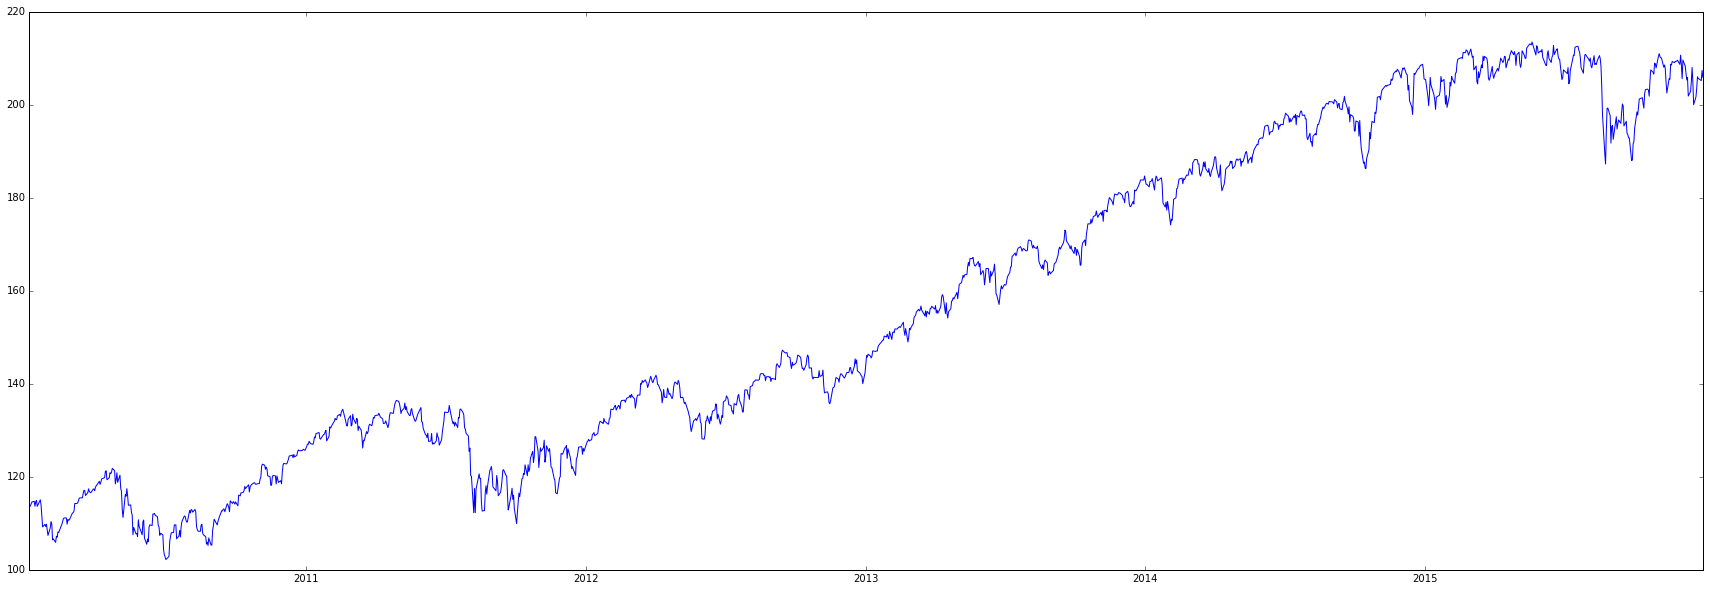

In [53]:
df_train['Volume'] = df_train['Volume'].apply(lambda a: float(a))
plt.figure(figsize=(30,10))
plt.plot(df_train['Date_Time'], df_train['Close'])
;

# Closing Price with Volume

''

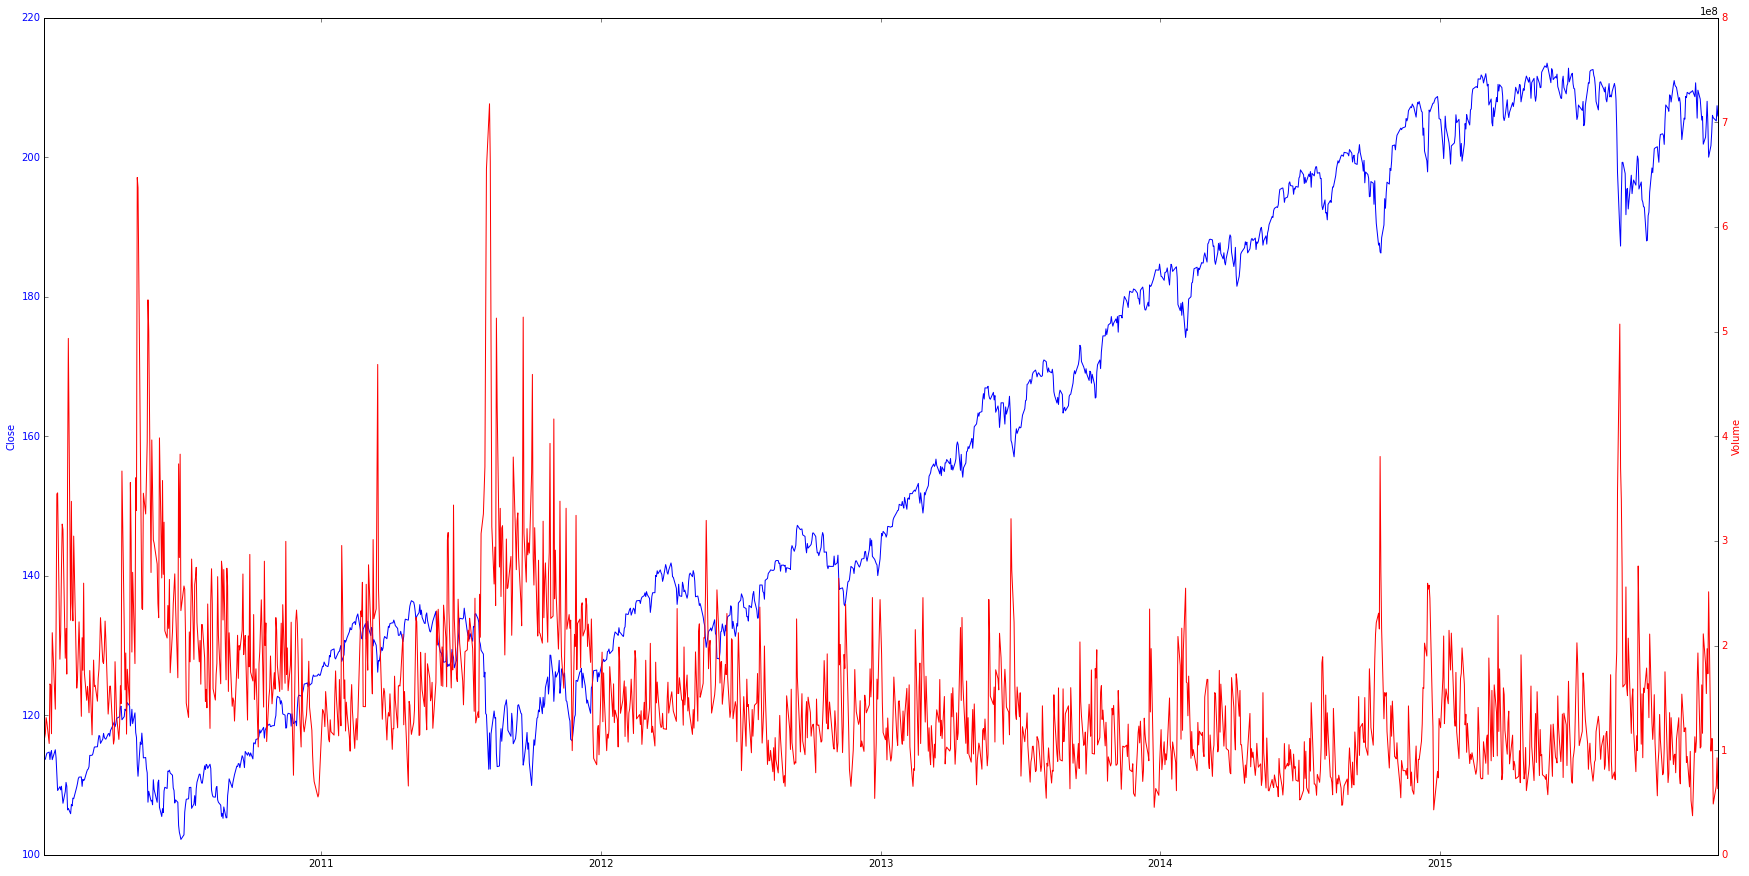

In [75]:
import numpy as np
from matplotlib import gridspec

fig, ax1 = plt.subplots(figsize=(30,15))
ax1.plot(df_train['Date_Time'], df_train['Close'])
#ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Close', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(df_train['Date_Time'], df_train['Volume'], color='r')
ax2.set_ylabel('Volume', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
;

### Analysis
It appears that when the volume spikes the Closing price lowers.

# Closing price with Month

''

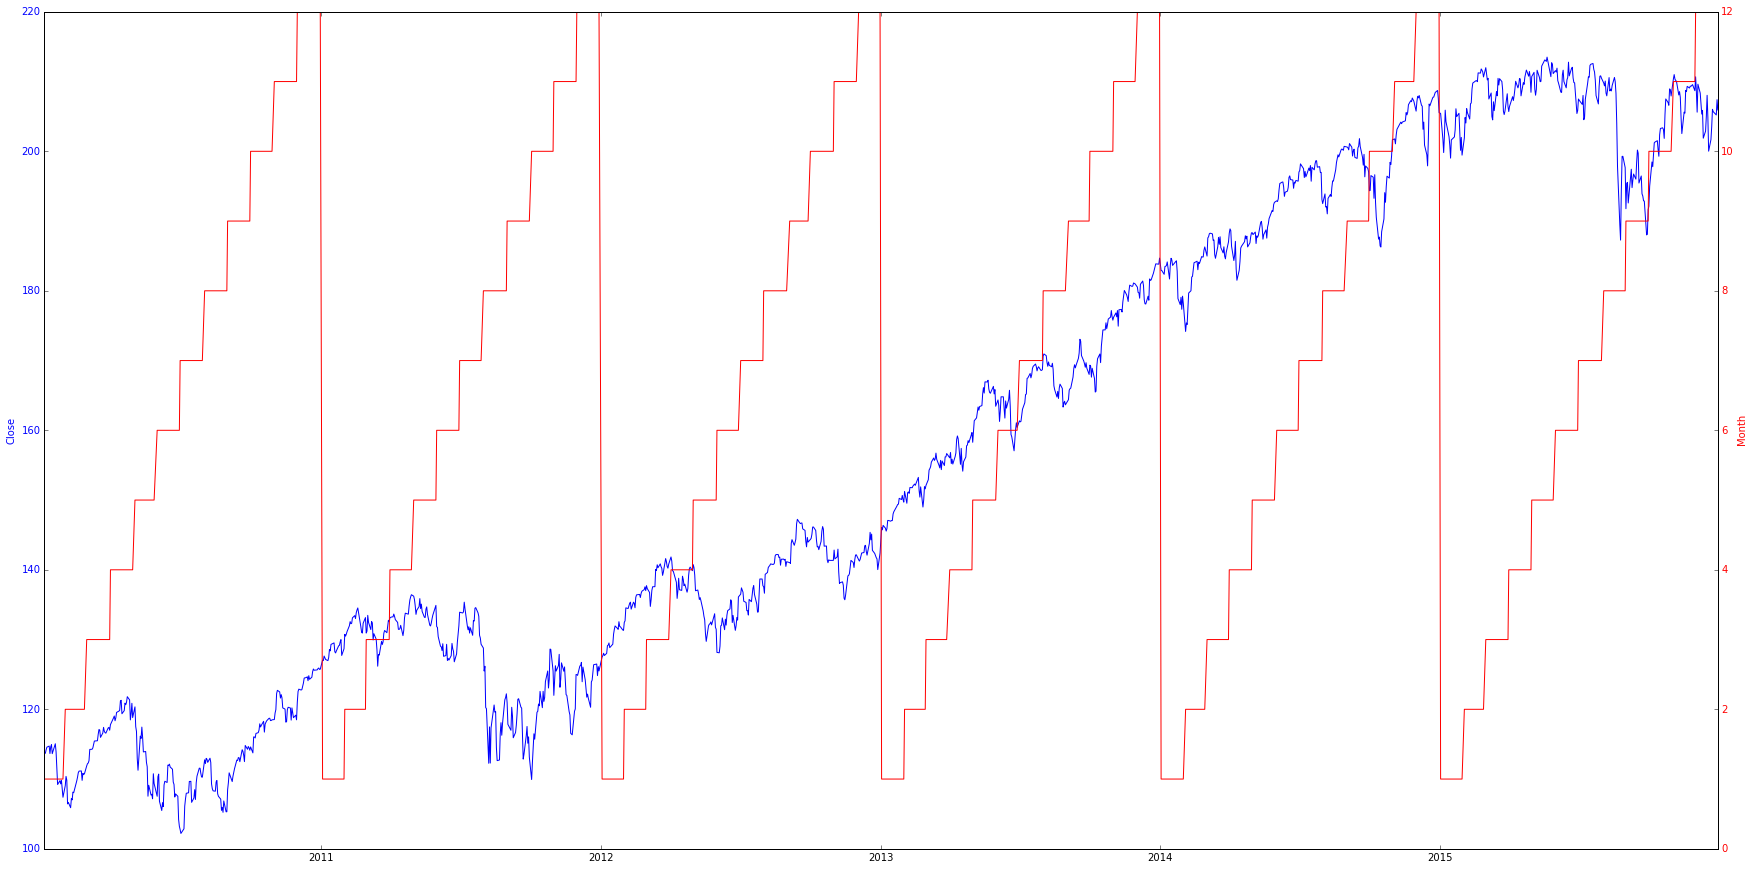

In [83]:
import numpy as np
from matplotlib import gridspec

fig, ax1 = plt.subplots(figsize=(30,15))
ax1.plot(df_train['Date_Time'], df_train['Close'])
#ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Close', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(df_train['Date_Time'], df_train['Month'], color='r')
ax2.set_ylabel('Month', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
;

# Closing Price with the Different between open and close

In [102]:
df_train['Open_Close_Diff'] = df_train['Open'] - df_train['Close']

''

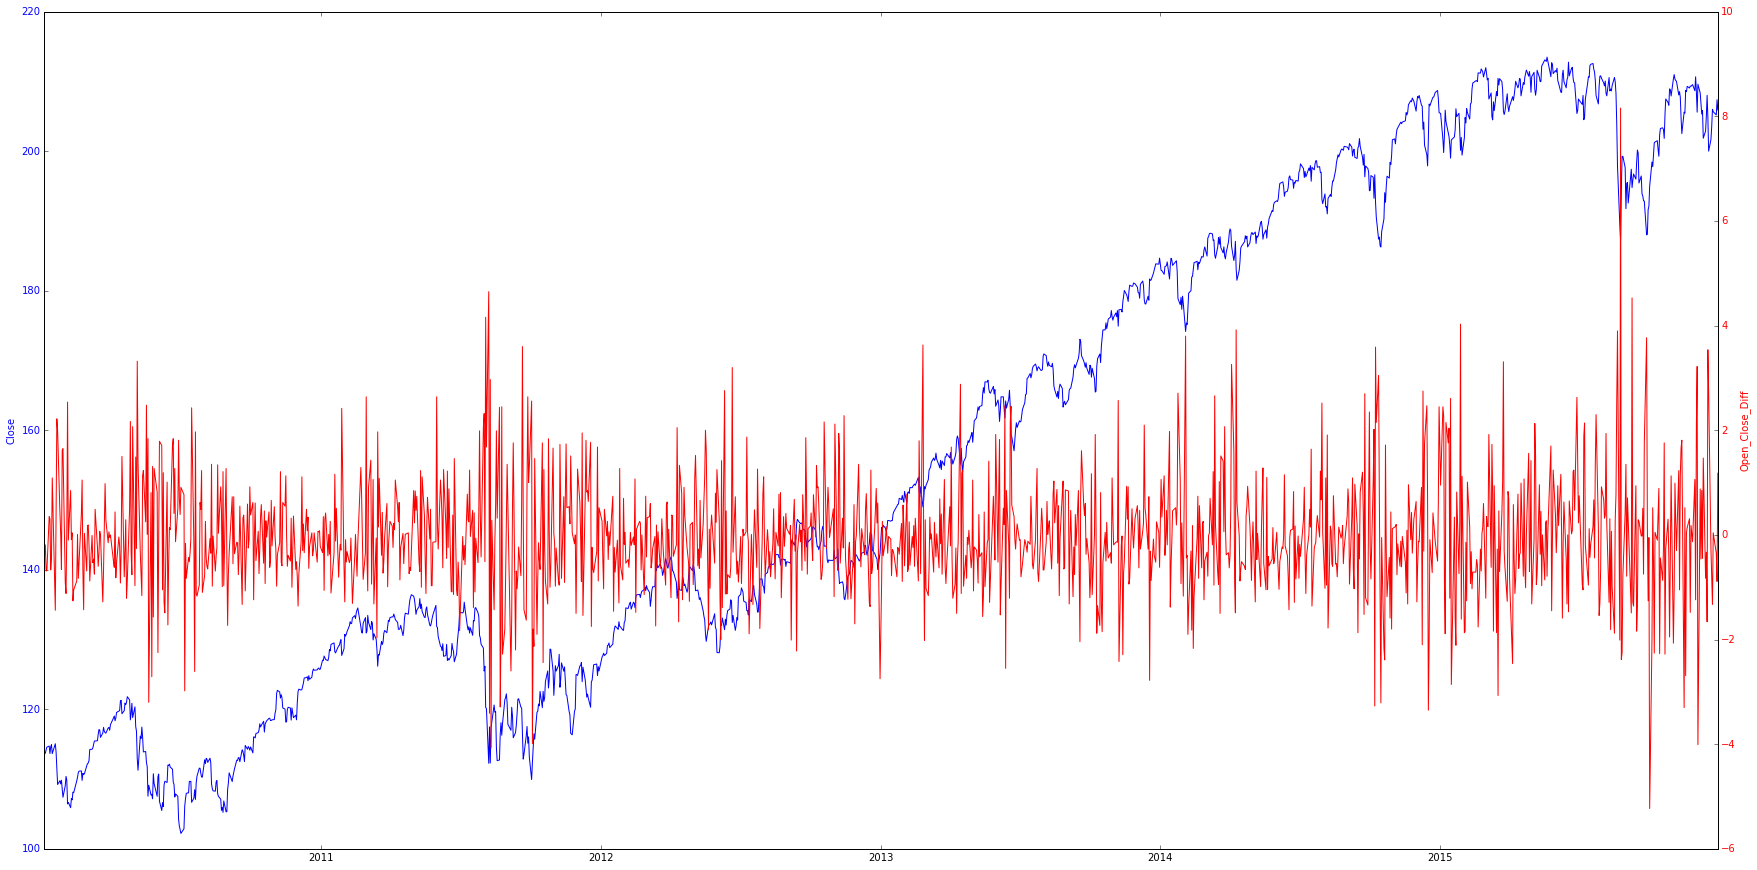

In [103]:
fig, ax1 = plt.subplots(figsize=(30,15))
ax1.plot(df_train['Date_Time'], df_train['Close'])
#ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Close', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(df_train['Date_Time'], df_train['Open_Close_Diff'], color='r')
ax2.set_ylabel('Open_Close_Diff', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
;

### Analysis
It appears that when the open and close are really high or low the market tends to go down.

# Closing Price with the Different between High and Low

In [104]:
df_train['High_Low_Diff'] = df_train['High'] - df_train['Low']

''

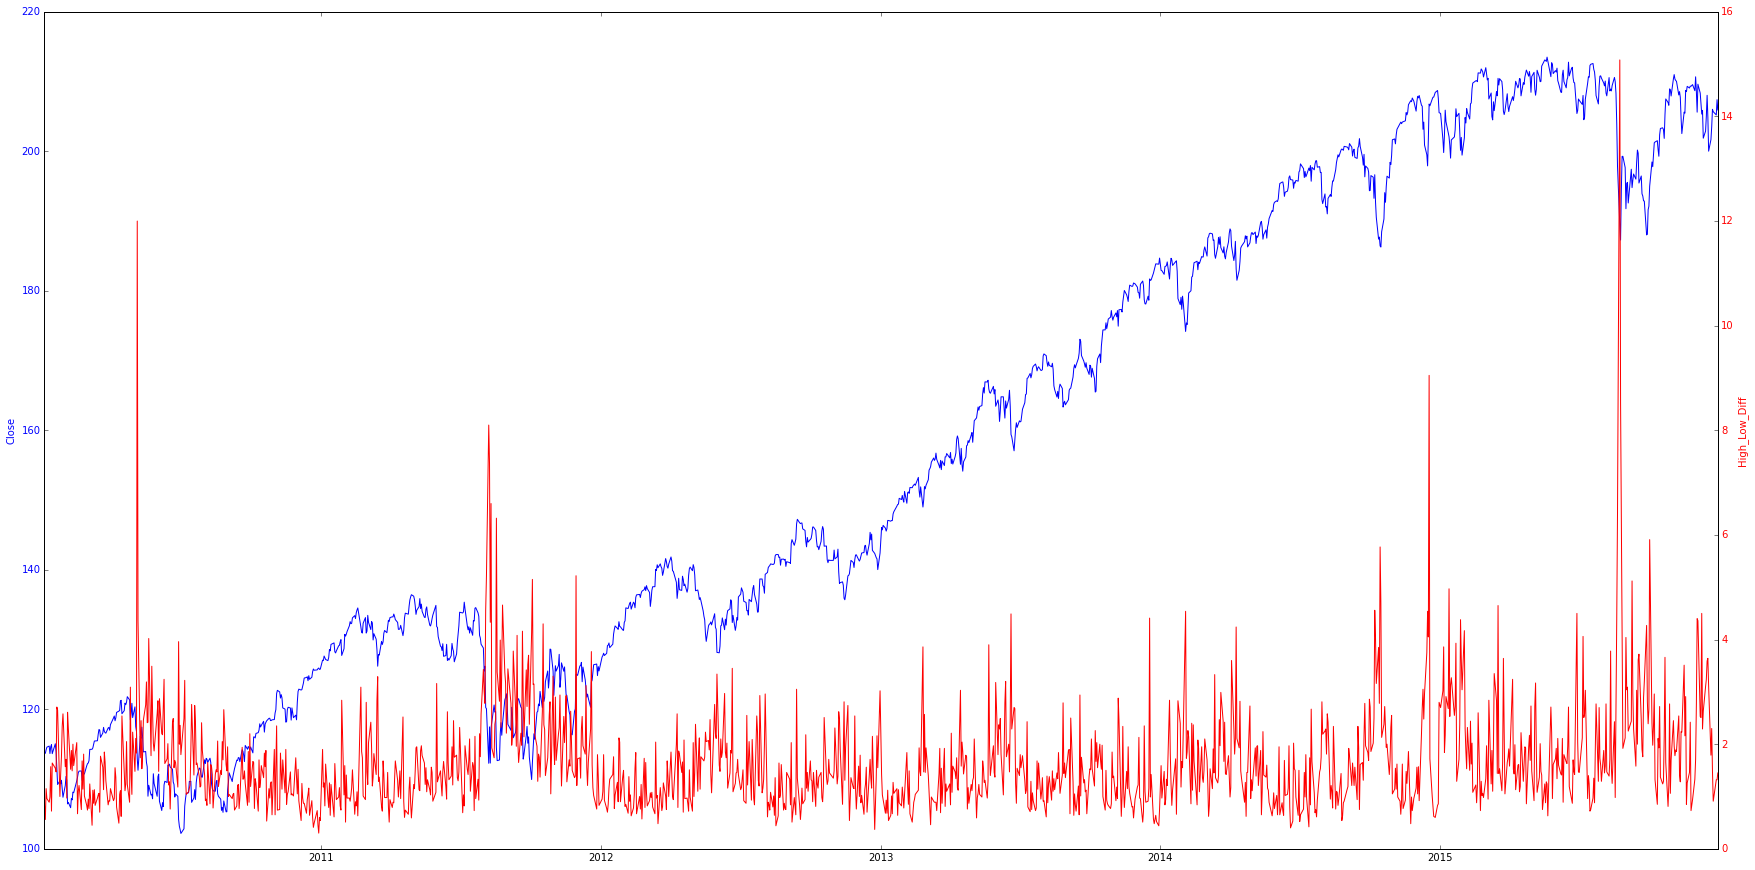

In [106]:
fig, ax1 = plt.subplots(figsize=(30,15))
ax1.plot(df_train['Date_Time'], df_train['Close'])
#ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Close', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(df_train['Date_Time'], df_train['High_Low_Diff'], color='r')
ax2.set_ylabel('High_Low_Diff', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
;

### Analysis
It appears that when there is a spike the market will go down or has already gone down.
This does not appear to be a good indicator because the huge spikes only occur maybe once a year.

# Based on the DayOfWeek will the next day go up or down?

([<matplotlib.axis.XTick at 0x120730e50>,
 <a list of 5 Text xticklabel objects>)

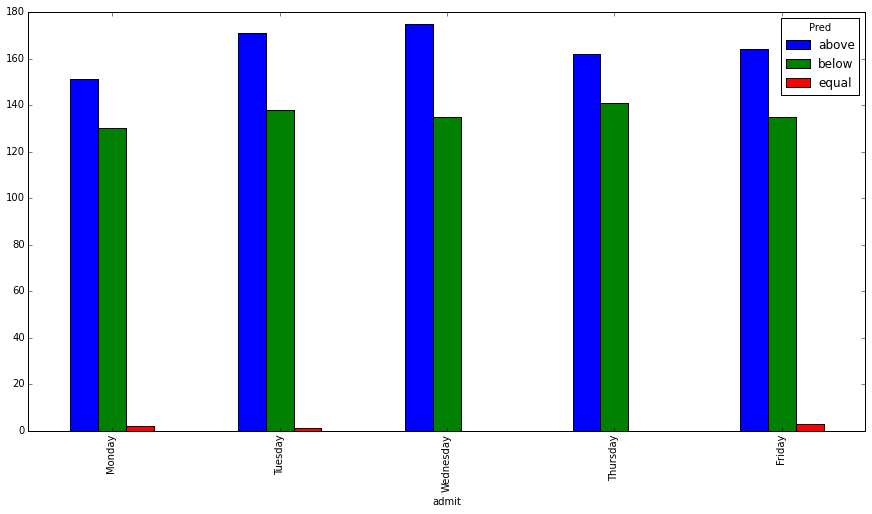

In [176]:
#plt.figure(figsize=(30,10))

admit = pd.crosstab(df_train['DOW'], df_train['Pred'], rownames=['admit'])
(admit).plot(kind="bar", figsize=(15,7.5))
plt.xticks([0, 1, 2, 3, 4], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']);
#plt.xlabel("Monday=0, Sunday=6")
#plt.ylabel("%")
#plt.title("Active or not based on day of week.");
#admit.plot(figsize=(20,20))

# Based on the Month will the next day go up or down?

(0, 100)

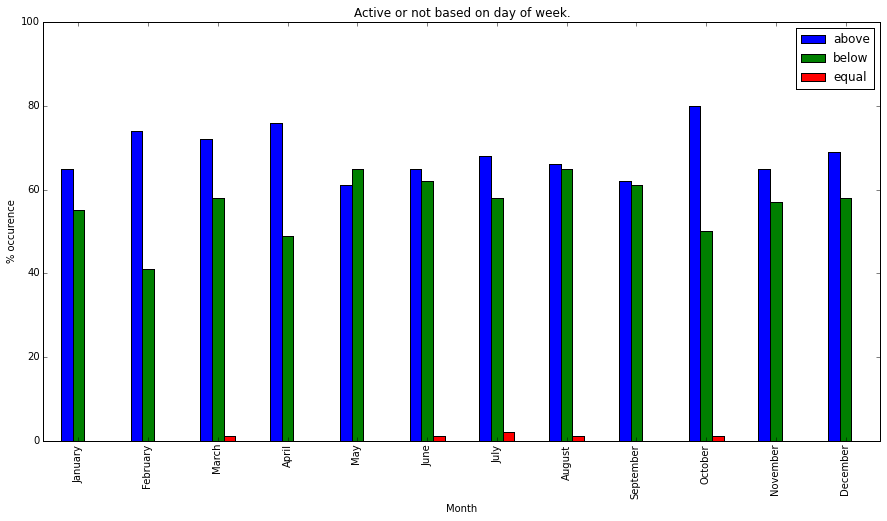

In [178]:
admit = pd.crosstab(df_train['Month'], df_train['Pred'])
(admit).plot(kind="bar", figsize=(15,7.5))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
plt.ylabel("% occurence")
plt.title("Active or not based on day of week.")
plt.legend(loc='best');
plt.ylim([0,100])
#admit.plot(figsize=(20,20))

# Based on the DOW will the Close be higher than the Open?

In [139]:
def check_up_down_equal(x):
    if x > 0:
        return 'Day Ended BELOW Open Price'
    elif x < 0:
        return 'Day Ended ABOVE Open Price'
    else:
        return 'Equal'
df_train['Today_Up_Down'] = df_train['Open_Close_Diff'].apply(check_up_down_equal)

''

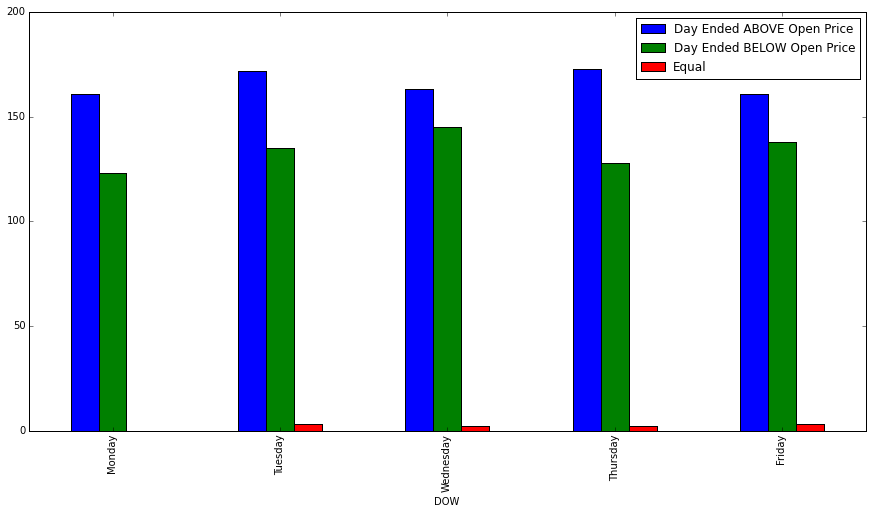

In [146]:
admit = pd.crosstab(df_train['DOW'], df_train['Today_Up_Down'])
(admit).plot(kind="bar", figsize=(15,7.5))
plt.legend(loc='best')
plt.xticks([0, 1, 2, 3, 4], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
#plt.ylabel("% occurence")
plt.ylim([0,200])
;

### Analysis
This plot shows that most days the closing will end above the opening price.  This is to be exspected given the upward trend overall.  

# Based on the Month will the Close be higher than the Open?

''

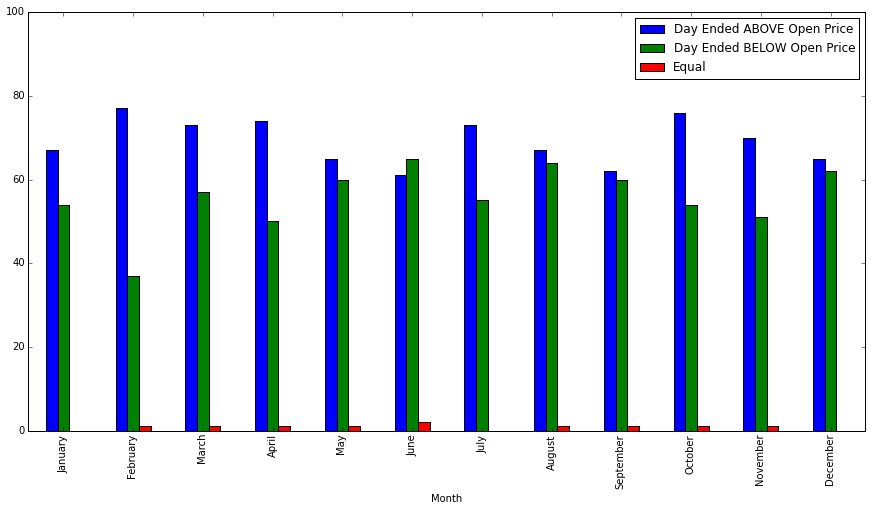

In [145]:
admit = pd.crosstab(df_train['Month'], df_train['Today_Up_Down'])
(admit).plot(kind="bar", figsize=(15,7.5))
plt.legend(loc='best')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
#plt.ylabel("% occurence")
plt.ylim([0,100])

;

### Analysis
It seems like June is the only month where, on average, the close ends below the open.

# Predict some more

In [243]:
training = df_train[['Open', 'Close', 'High', 'Low', 'Pred']]
testing = df_test[['Open', 'Close', 'High', 'Low', 'Pred']]

In [244]:
training = pd.concat([training, pd.get_dummies(df_train['DOW'], prefix='dow')], axis=1)
testing = pd.concat([testing, pd.get_dummies(df_test['DOW'], prefix='dow')], axis=1)

In [245]:
training.columns
training['dow_1'].head()

0    0
1    1
2    0
3    0
4    0
Name: dow_1, dtype: float64

### Random forest with added DOW dummies

In [246]:
features = ['Open', 'Close', 'High', 'Low', 'Pred', 'dow_1', 'dow_2', 'dow_3', 'dow_4']

X_train = training[features].values
y_train = training['Pred'].values

X_test = testing[features].values
y_test = testing['Pred'].values

rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)

pred = rfc_model.predict(X_test)

print "Accuracy Score:", accuracy_score(y_test, pred)

Accuracy Score: 1.0
